1. Прочитайте csv файл
2. Виведіть перші п'ять рядків

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_name = "bestsellers_with_categories.csv"

df = pd.read_csv(file_name)
print("Перші п'ять рядків таблиці:")
print(df.head())

Перші п'ять рядків таблиці:
                                                Name  \
0                      10-Day Green Smoothie Cleanse   
1                                  11/22/63: A Novel   
2            12 Rules for Life: An Antidote to Chaos   
3                             1984 (Signet Classics)   
4  5,000 Awesome Facts (About Everything!) (Natio...   

                     Author  User Rating  Reviews  Price  Year        Genre  
0                  JJ Smith          4.7    17350      8  2016  Non Fiction  
1              Stephen King          4.6     2052     22  2011      Fiction  
2        Jordan B. Peterson          4.7    18979     15  2018  Non Fiction  
3             George Orwell          4.7    21424      6  2017      Fiction  
4  National Geographic Kids          4.8     7665     12  2019  Non Fiction  


3. Визначте розмір таблиці за допомогою методу shape

In [10]:
print("\nРозміри датасету:\n", df.shape)


Розміри датасету:
 (550, 7)


4. Відповідь: Про скільки книг зберігає дані датасет?

In [11]:
num_books = df.shape[0]
print(f"\nДатасет зберігає дані про {num_books} книг.")


Датасет зберігає дані про 550 книг.


In [12]:
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df)

                                                  name  \
0                        10-Day Green Smoothie Cleanse   
1                                    11/22/63: A Novel   
2              12 Rules for Life: An Antidote to Chaos   
3                               1984 (Signet Classics)   
4    5,000 Awesome Facts (About Everything!) (Natio...   
..                                                 ...   
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)   
546  You Are a Badass: How to Stop Doubting Your Gr...   
547  You Are a Badass: How to Stop Doubting Your Gr...   
548  You Are a Badass: How to Stop Doubting Your Gr...   
549  You Are a Badass: How to Stop Doubting Your Gr...   

                       author  user_rating  reviews  price  year        genre  
0                    JJ Smith          4.7    17350      8  2016  Non Fiction  
1                Stephen King          4.6     2052     22  2011      Fiction  
2          Jordan B. Peterson          4.7    18979     15  201

Первинне дослідження даних
1. Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [13]:
na_counts = df.isna().sum()
print("Чи є в якихось змінних пропуски?")
print((na_counts > 0).any())

Чи є в якихось змінних пропуски?
False


2. Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [14]:
unique_genres = df['genre'].unique()
print("Які є унікальні жанри?")
print(unique_genres)

Які є унікальні жанри?
['Non Fiction' 'Fiction']


3. Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

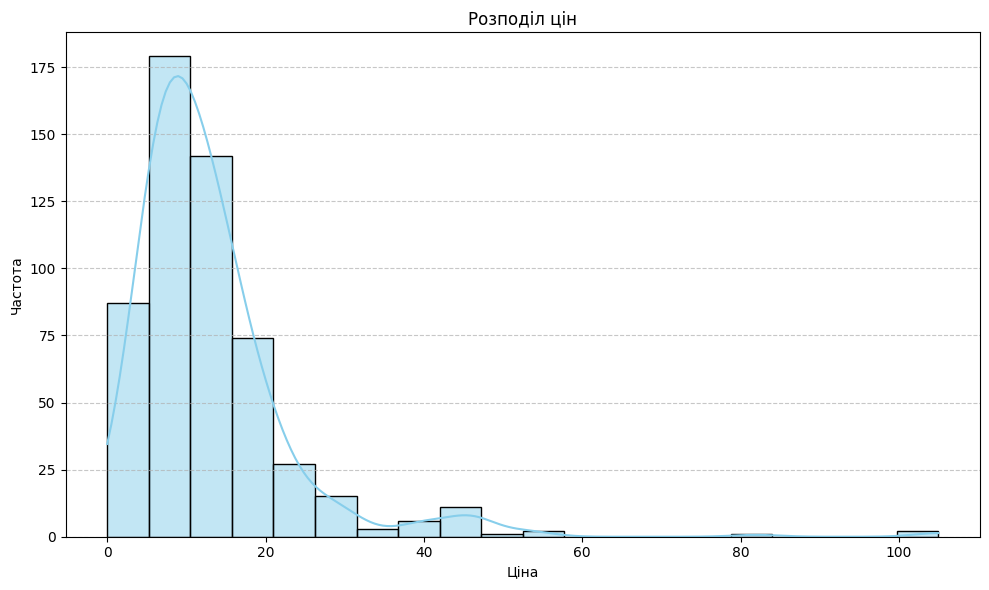

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл цін')
plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

4. Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [16]:
max_price = df['price'].max()

min_price = df['price'].min()

mean_price = df['price'].mean()

median_price = df['price'].median()

print("Максимальна ціна:", max_price)
print("Мінімальна ціна:", min_price)
print("Середня ціна:", mean_price)
print("Медіанна ціна:", median_price)


Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна ціна: 11.0


Пошук та сортування даних
1. Відповідь: Який рейтинг у датасеті найвищий? 

In [18]:
max_rating = df['user_rating'].max()
print("Найвищий рейтинг у датасеті:", max_rating)

Найвищий рейтинг у датасеті: 4.9


2. Відповідь: Скільки книг мають такий рейтинг?

In [19]:
books_with_max_rating = df[df['user_rating'] == max_rating].shape[0]
print("Кількість книг з найвищим рейтингом:", books_with_max_rating)

Кількість книг з найвищим рейтингом: 52


3. Відповідь: Яка книга має найбільше відгуків? 

In [20]:
book_with_most_reviews = df[df['reviews'] == df['reviews'].max()]['name'].iloc[0]
print("Книга з найбільшою кількістю відгуків:", book_with_most_reviews)

Книга з найбільшою кількістю відгуків: Where the Crawdads Sing


4. Відповідь: З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [21]:
top_50_2015 = df[(df['year'] == 2015) & (df['name'].isin(df.nlargest(50, 'user_rating')['name']))]
most_expensive_2015 = top_50_2015.loc[top_50_2015['price'].idxmax()]['name']
print("Найдорожча книга з Топ-50 у 2015 році:", most_expensive_2015)


Найдорожча книга з Топ-50 у 2015 році: Humans of New York : Stories


5. Відповідь: Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [23]:
fiction_top_50_2010 = df[(df['year'] == 2010) & (df['genre'] == 'fiction') & (df['name'].isin(df.nlargest(50, 'user_rating')['name']))].shape[0]
print("Кількість книг жанру Fiction у Топ-50 у 2010 році:", fiction_top_50_2010)


Кількість книг жанру Fiction у Топ-50 у 2010 році: 0


6. Відповідь: Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [24]:
books_rating_49_2010_2011 = df[(df['user_rating'] == 4.9) & ((df['year'] == 2010) | (df['year'] == 2011))].shape[0]
print("Кількість книг з рейтингом 4.9 у 2010 та 2011 роках:", books_rating_49_2010_2011)

Кількість книг з рейтингом 4.9 у 2010 та 2011 роках: 1


7. Відсортуйте за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values)

In [27]:
sorted_books_2015_under_8 = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values(by='price')
print(sorted_books_2015_under_8)

                                                  name              author  \
507                              To Kill a Mockingbird          Harper Lee   
210                      Laugh-Out-Loud Jokes for Kids         Rob Elliott   
206                         Knock-Knock Jokes for Kids         Rob Elliott   
111                                    First 100 Words        Roger Priddy   
123                               Giraffes Can't Dance       Giles Andreae   
54   Creative Haven Creative Cats Coloring Book (Ad...     Marjorie Sarnat   
63                      Dear Zoo: A Lift-the-Flap Book        Rod Campbell   
89   Dover Creative Haven Art Nouveau Animal Design...         Marty Noble   
478                        The Very Hungry Caterpillar          Eric Carle   
201  Killing Reagan: The Violent Assault That Chang...       Bill O'Reilly   
28                        Baby Touch and Feel: Animals                  DK   
224                                   Love You Forever       Rob

8. Відповідь: Яка книга остання у відсортованому списку? 

In [26]:
last_book_sorted = sorted_books_2015_under_8.iloc[-1]['name']
print("Яка книга остання у відсортованому списку? Відповідь:", last_book_sorted)

Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)


Агрегування даних та з'єднання таблиць
1. Відповідь: Максимальна ціна для жанру Fiction: Відповідь

In [32]:
prices_summary = df.groupby('genre')['price'].agg(['max', 'min'])
max_price_fiction = prices_summary.loc['Fiction', 'max']
print("Максимальна ціна для жанру Fiction:", max_price_fiction)

Максимальна ціна для жанру Fiction: 82


2. Відповідь: Мінімальна ціна для жанру Fiction: Відповідь

In [33]:
min_price_fiction = prices_summary.loc['Fiction', 'min']
print("Мінімальна ціна для жанру Fiction:", min_price_fiction)

Мінімальна ціна для жанру Fiction: 0


3. Відповідь: Максимальна ціна для жанру Non Fiction: Відповідь

In [34]:
max_price_non_fiction = prices_summary.loc['Non Fiction', 'max']
print("Максимальна ціна для жанру Non Fiction:", max_price_non_fiction)

Максимальна ціна для жанру Non Fiction: 105


4. Відповідь: Мінімальна ціна для жанру Non Fiction: Відповідь

In [35]:
min_price_non_fiction = prices_summary.loc['Non Fiction', 'min']
print("Мінімальна ціна для жанру Non Fiction:", min_price_non_fiction)

Мінімальна ціна для жанру Non Fiction: 0


Cтворіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [36]:
authors_books_count = df.groupby('author').size().reset_index(name='Books Count')

table_size = authors_books_count.shape

author_most_books = authors_books_count.loc[authors_books_count['Books Count'].idxmax(), 'author']
books_count_most_books_author = authors_books_count['Books Count'].max()


5. Відповідь: Якої розмірності вийшла таблиця? Відповідь:

In [37]:
print("Якої розмірності вийшла таблиця? Відповідь:", table_size)

Якої розмірності вийшла таблиця? Відповідь: (248, 2)


6. Відповідь: Який автор має найбільше книг? Відповідь:

In [38]:
print("Який автор має найбільше книг? Відповідь:", author_most_books)

Який автор має найбільше книг? Відповідь: Jeff Kinney


7. Відповідь: Скільки книг цього автора? Відповідь:

In [39]:
print("Скільки книг цього автора? Відповідь:", books_count_most_books_author)

Скільки книг цього автора? Відповідь: 12


Cтворіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [40]:
authors_avg_rating = df.groupby('author')['user_rating'].mean().reset_index(name='Avg Rating')

author_min_avg_rating = authors_avg_rating.loc[authors_avg_rating['Avg Rating'].idxmin(), 'author']
min_avg_rating = authors_avg_rating['Avg Rating'].min()

8. Відповідь: У якого автора середній рейтинг мінімальний? Відповідь:

In [41]:
print("У якого автора середній рейтинг мінімальний? Відповідь:", author_min_avg_rating)

У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt


9. Відповідь: Який у цього автора середній рейтинг? Відповідь:

In [42]:
print("Який у цього автора середній рейтинг? Відповідь:", min_avg_rating)

Який у цього автора середній рейтинг? Відповідь: 3.9


10. З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [48]:
authors_summary = pd.concat([authors_books_count.set_index('author'), authors_avg_rating.set_index('author')], axis=1).reset_index()
print(authors_summary)

                         author  Books Count  Avg Rating
0              Abraham Verghese            2    4.600000
1                Adam Gasiewski            1    4.400000
2                 Adam Mansbach            1    4.800000
3                     Adir Levy            1    4.800000
4    Admiral William H. McRaven            1    4.700000
..                          ...          ...         ...
243             Walter Isaacson            3    4.566667
244               William Davis            2    4.400000
245            William P. Young            2    4.600000
246            Wizards RPG Team            3    4.800000
247                Zhi Gang Sha            2    4.600000

[248 rows x 3 columns]


11. Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [49]:
authors_summary_sorted = authors_summary.sort_values(by=['Books Count', 'Avg Rating'])
print(authors_summary_sorted)

                                 author  Books Count  Avg Rating
171                      Muriel Barbery            1    4.000000
43                         Chris Cleave            1    4.100000
109                   Ian K. Smith M.D.            1    4.100000
186                        Pierre Dukan            1    4.100000
81                     Elizabeth Strout            1    4.200000
..                                  ...          ...         ...
11   American Psychological Association           10    4.500000
226                     Suzanne Collins           11    4.663636
92                         Gary Chapman           11    4.736364
197                        Rick Riordan           11    4.772727
120                         Jeff Kinney           12    4.800000

[248 rows x 3 columns]


12. Відповідь: Який автор перший у списку?

In [51]:
first_author_in_list = authors_summary_sorted.iloc[0]['author']
print("Який автор перший у списку? Відповідь:", first_author_in_list)

Який автор перший у списку? Відповідь: Muriel Barbery


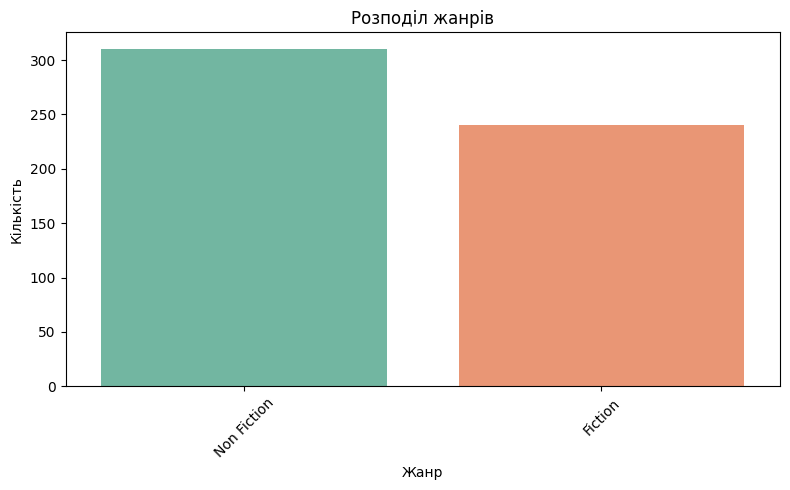

In [56]:
# Графік розподілу жанрів
plt.figure(figsize=(8, 5))
sns.countplot(x='genre', data=df, palette='Set2', order=df['genre'].value_counts().index, hue='genre', dodge=False)
plt.title('Розподіл жанрів')
plt.xlabel('Жанр')
plt.ylabel('Кількість')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()